In [35]:
from maestro_pizza_maker.pizza_menu import PizzaMenu
from maestro_pizza_maker.pizza import Pizza
from maestro_pizza_maker.ingredients import PizzaIngredients
from maestro_pizza_maker.pizza_sensitivities import (
    menu_sensitivity_protein,
    menu_sensitivity_carbs,
    menu_sensitivity_fat,
)
from maestro_pizza_maker.taste_at_risk import (
    taste_at_risk_pizza,
    taste_at_risk_menu,
    conditional_taste_at_risk_pizza,
    conditional_taste_at_risk_menu,
)

In [281]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mpl_parameters = {"font.size": 16, "axes.titlesize": "medium"}
plt.rcParams.update(mpl_parameters)

In [163]:
# consider following menu
pizza_menu = PizzaMenu(
    pizzas=[
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.THIN_DOUGH,
            cheese=[PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.APPLE],
            meat=[PizzaIngredients.SAUSAGE],
            vegetables=[PizzaIngredients.MUSHROOMS, PizzaIngredients.PEPPER],
        ),
        Pizza(
            sauce=PizzaIngredients.CREAM_SAUCE,
            dough=PizzaIngredients.WHOLEMEAL_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA, PizzaIngredients.CHEDDAR],
            fruits=[PizzaIngredients.PINEAPPLE, PizzaIngredients.APPLE],
            meat=[
                PizzaIngredients.BACON,
                PizzaIngredients.HAM,
                PizzaIngredients.SAUSAGE,
            ],
            vegetables=[
                PizzaIngredients.MUSHROOMS,
                PizzaIngredients.ONIONS,
                PizzaIngredients.PEPPER,
            ],
        ),
        Pizza(
            sauce=PizzaIngredients.TOMATO_SAUCE,
            dough=PizzaIngredients.CLASSIC_DOUGH,
            cheese=[PizzaIngredients.MOZZARELA],
            fruits=[PizzaIngredients.PINEAPPLE],
            meat=[PizzaIngredients.BACON, PizzaIngredients.HAM],
            vegetables=[PizzaIngredients.ONIONS],
        ),
    ]
)


In [5]:
# create a dataframe with the menu using the to_dataframe method you have implemented in the PizzaMenu class
# and display it

In [329]:
df = pizza_menu.to_dataframe(sort_by="price", descendent=False)
display(df)

,name,price,protein,average_fat,carbohydrates,calories,ingredients
1,THIN DOUGH_TOMATO SAUCE_CHEDDAR_APPLE_SAUSAGE_...,6.5,45.5,28.690186,28.0,1070.0,"[THIN DOUGH, TOMATO SAUCE, CHEDDAR, APPLE, SAU..."
7,THIN DOUGH_TOMATO SAUCE_CHEDDAR_APPLE_SAUSAGE_...,6.5,45.5,28.690186,28.0,1070.0,"[THIN DOUGH, TOMATO SAUCE, CHEDDAR, APPLE, SAU..."
4,THIN DOUGH_CREAM SAUCE_CHEDDAR_APPLE_SAUSAGE_M...,6.6,45.6,28.278666,29.0,1080.0,"[THIN DOUGH, CREAM SAUCE, CHEDDAR, APPLE, SAUS..."
3,CLASSIC DOUGH_TOMATO SAUCE_MOZZRELA_PINEAPPLE_...,7.5,60.5,30.203236,23.0,1820.0,"[CLASSIC DOUGH, TOMATO SAUCE, MOZZRELA, PINEAP..."
9,CLASSIC DOUGH_TOMATO SAUCE_MOZZRELA_PINEAPPLE_...,7.5,60.5,30.203236,23.0,1820.0,"[CLASSIC DOUGH, TOMATO SAUCE, MOZZRELA, PINEAP..."
0,CLASSIC DOUGH_CREAM SAUCE_MOZZRELA_PINEAPPLE_B...,7.6,60.6,29.791716,24.0,1830.0,"[CLASSIC DOUGH, CREAM SAUCE, MOZZRELA, PINEAPP..."
6,CLASSIC DOUGH_CREAM SAUCE_MOZZRELA_PINEAPPLE_B...,7.6,60.6,29.791716,24.0,1830.0,"[CLASSIC DOUGH, CREAM SAUCE, MOZZRELA, PINEAPP..."
5,WHOLEMEAL DOUGH_TOMATO SAUCE_MOZZRELA_CHEDDAR_...,12.5,95.5,29.446079,38.0,2770.0,"[WHOLEMEAL DOUGH, TOMATO SAUCE, MOZZRELA, CHED..."
2,WHOLEMEAL DOUGH_CREAM SAUCE_MOZZRELA_CHEDDAR_P...,12.6,95.6,29.206026,39.0,2780.0,"[WHOLEMEAL DOUGH, CREAM SAUCE, MOZZRELA, CHEDD..."
8,WHOLEMEAL DOUGH_CREAM SAUCE_MOZZRELA_CHEDDAR_P...,12.6,95.6,29.206026,39.0,2780.0,"[WHOLEMEAL DOUGH, CREAM SAUCE, MOZZRELA, CHEDD..."


In [4]:
# compute basic descriptive statistics for the menu.
# pay a special attention to the price column, as it is the most important one

# Following steps are optional, but recommended:
# 1. Create a boxplot for the price column
# 2. Create a histogram for the price column
# 3. Create a scatter plot for the price column and any other column of your choice


In [165]:
df.describe()

,price,protein,average_fat,carbohydrates,calories
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,8.75000,66.550000,29.350707,29.500000,1885.000000
std,2.67135,21.068737,0.659579,6.687468,697.316284
min,6.50000,45.500000,28.278666,23.000000,1070.000000
25%,6.82500,49.325000,28.819146,24.000000,1265.000000
50%,7.55000,60.550000,29.326052,28.000000,1825.000000
75%,11.27500,86.775000,29.791716,35.750000,2535.000000
max,12.60000,95.600000,30.203236,39.000000,2780.000000


In [166]:
df["price"].describe()

count    10.00000
mean      8.75000
std       2.67135
min       6.50000
25%       6.82500
50%       7.55000
75%      11.27500
max      12.60000
Name: price, dtype: float64

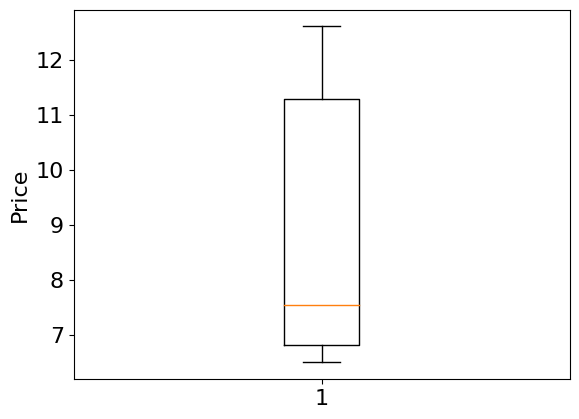

In [167]:
plt.boxplot(df["price"])
plt.ylabel("Price")
plt.show()

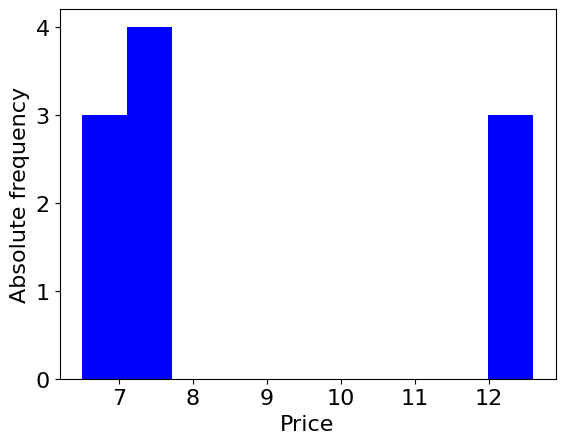

In [168]:
plt.hist(df["price"], color="b")
plt.xlabel("Price")
plt.ylabel("Absolute frequency")
plt.show()

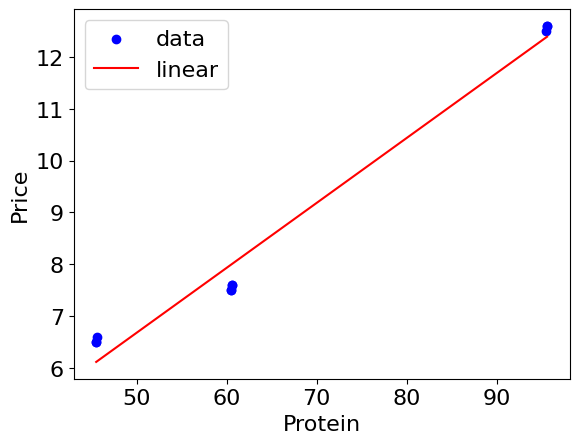

In [320]:
xcol = "protein"
ycol = "price"
plt.scatter(df[xcol], df[ycol], c="b", label="data")
# plt.plot(df[xcol], df[ycol], "bo", label="data")
plt.xlabel(xcol.title())
plt.ylabel(ycol.title())

x = np.reshape(df[xcol], (-1, 1))
y = df[ycol]
reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
plt.plot(df[xcol], y_pred, c="red", label="linear")

plt.legend()
plt.show()

In [321]:
# The red line shows a linear regression fit to the price-protein data. This is 
# the same fit used to compute menu_sensitivity_protein in pizza_sensitivities.py.
# To be precise, the slope of the fitted curve corresponds to menu_sensitivity_protein.
print(reg.coef_[0])
print(menu_sensitivity_protein(pizza_menu))

0.1253621691979399
0.12536216919793994


In [170]:
# Try to answer following question:
# 1. How much will price change on average if we increase the amount of protein in the pizza by 1 unit?
# 2. How much will price change on average if we increase the amount of average_fat in the pizza by 1 unit?
# 3. How much will price change on average if we increase the amount of carbohydrates in the pizza by 1 unit?

# Hint: use functions that you have implemented in the pizza_sensitivities.py


In [222]:
print("On average,")
print("1. if we increase the amount of protein in the pizza by 1 unit, the price will increase by", 
      round(menu_sensitivity_protein(pizza_menu), 3), "units.")
print("2. if we increase the amount of average_fat in the pizza by 1 unit, the price will increase by", 
      round(menu_sensitivity_fat(pizza_menu), 3), "units.")
print("3. if we increase the amount of carbohydrates in the pizza by 1 unit, the price will increase by", 
      round(menu_sensitivity_carbs(pizza_menu), 3), "units.")

On average,
1. if we increase the amount of protein in the pizza by 1 unit, the price will increase by 0.125 units.
2. if we increase the amount of average_fat in the pizza by 1 unit, the price will increase by 0.351 units.
3. if we increase the amount of carbohydrates in the pizza by 1 unit, the price will increase by 0.352 units.


In [6]:
# Compute Taste at Risk (TaR) for each pizza in the menu and for the whole menu and briefly comment on the results
# Use quantile = 0.1
# Answer following question:
# 1. Does the sum of TaR for each pizza in the menu equal to the TaR of the whole menu and why?

# Hint: use functions that you have implemented in the taste_at_risk.py


In [214]:
quantile = 0.1
print("TaR of each pizza:", 
      *[taste_at_risk_pizza(pizza=pizza, quantile=quantile) for pizza in pizza_menu.pizzas], 
      sep="\n")
print("")
print("TaR of the whole menu:", taste_at_risk_menu(menu=pizza_menu, quantile=quantile), sep="\n")

TaR of each pizza:
31.77635394847147
23.04816382865777
48.20777988839925
32.49682353171359
22.32899182227614
48.84857264083904
31.77635394847147
23.04816382865777
48.20777988839925
32.49682353171359

TaR of the whole menu:
342.56144263672076


In [ ]:
# The individual TaRs of the pizzas roughly fall into the interval [20, 50].
# The TaR of the whole menu is approximately 10 times larger than the individual TaRs.
# This is intuitive since we have a total of 10 pizzas in our menu and the taste of the 
# whole menu is computed as the sum of the tastes of each pizza contained in the menu.

In [ ]:
# To get a better feeling of the random variable taste of each pizza, for one thing, 
# and the whole menu, for another, we plot box plots and histograms in the following.

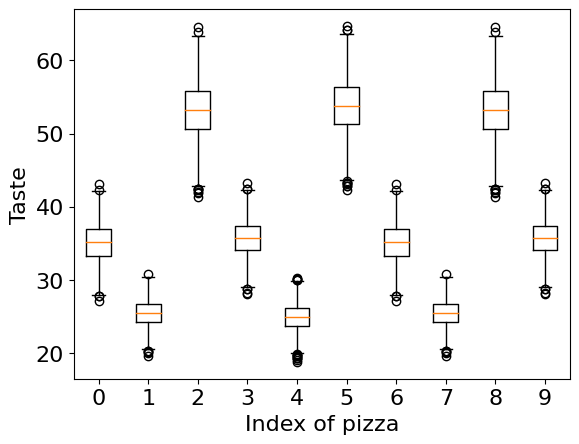

In [183]:
plt.boxplot([pizza.taste for pizza in pizza_menu.pizzas], labels=range(10))
plt.xlabel("Index of pizza")
plt.ylabel("Taste")
plt.show()

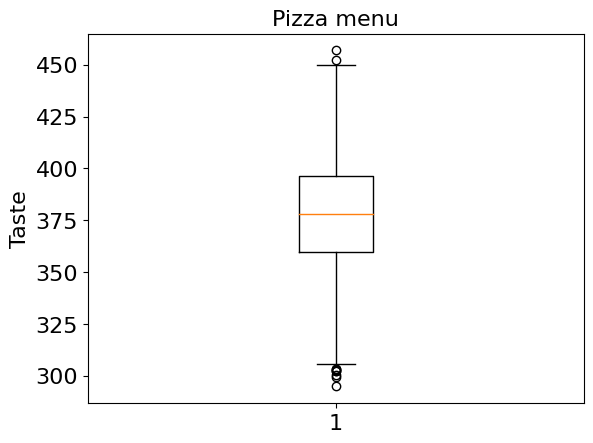

In [198]:
plt.boxplot(sum(pizza.taste for pizza in pizza_menu.pizzas))
plt.ylabel("Taste")
plt.title("Pizza menu")
plt.show()

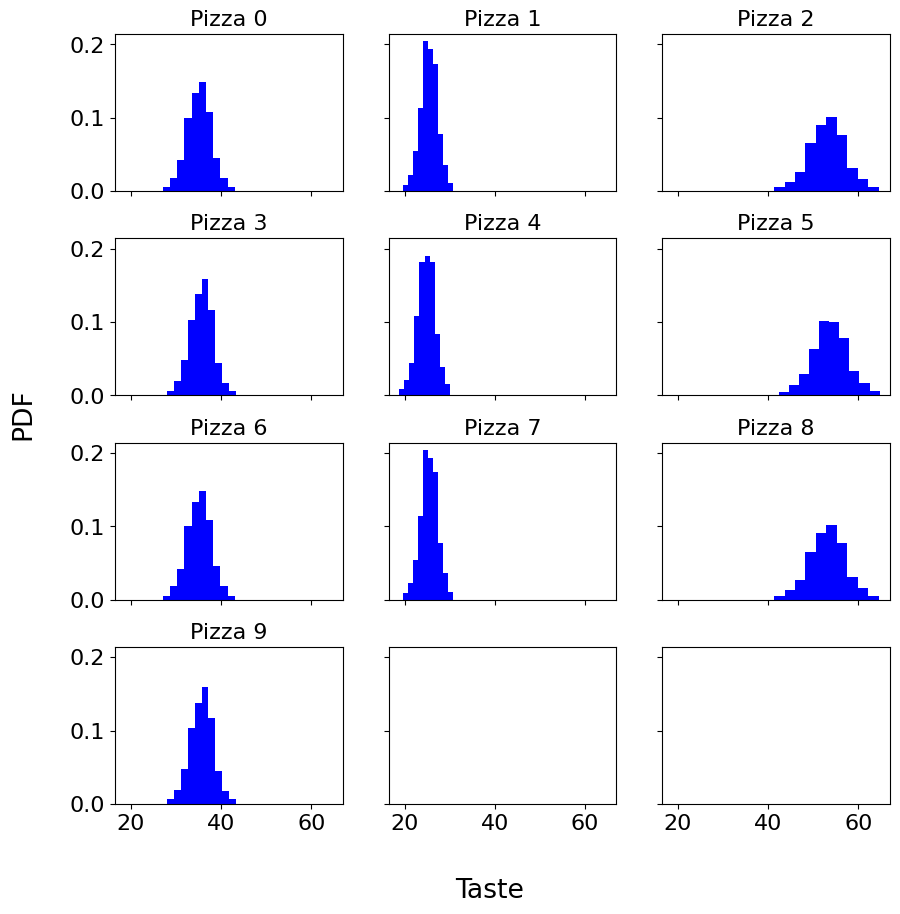

In [277]:
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(10, 10))
fig.subplots_adjust(hspace=0.3)
fig.supxlabel("Taste")
fig.supylabel("PDF")

axs = axs.ravel()

for i in range(pizza_menu.__len__()):
    axs[i].hist(pizza_menu.pizzas[i].taste, color="b", density=True)
    # axs[i].set_xlabel("Taste")
    # axs[i].set_ylabel("PDF")
    axs[i].set_title(f"Pizza {i}")

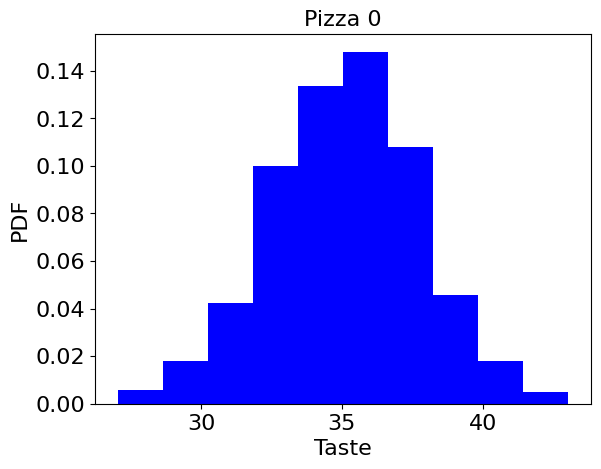

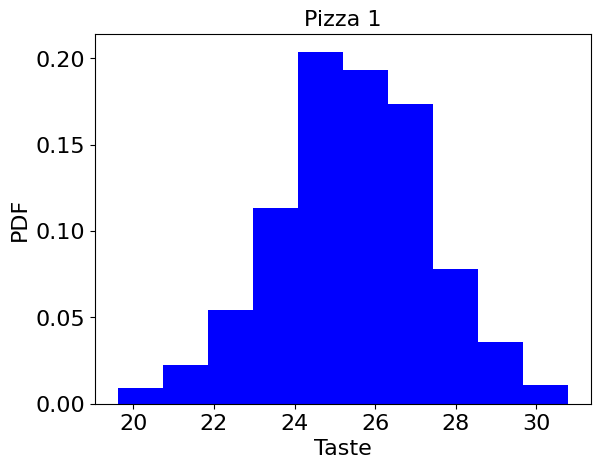

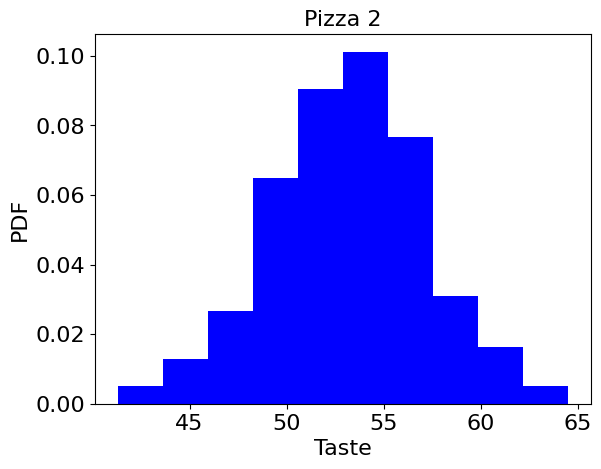

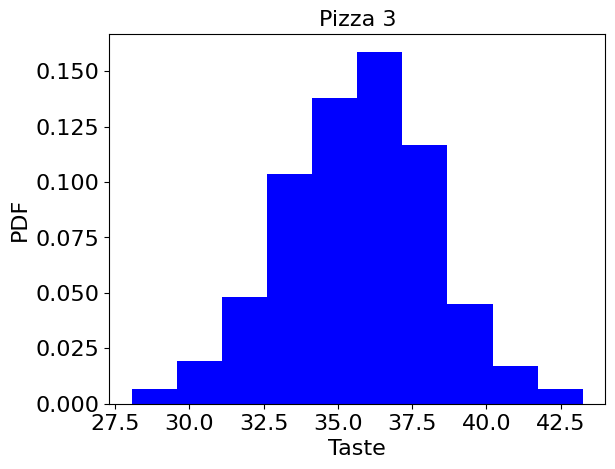

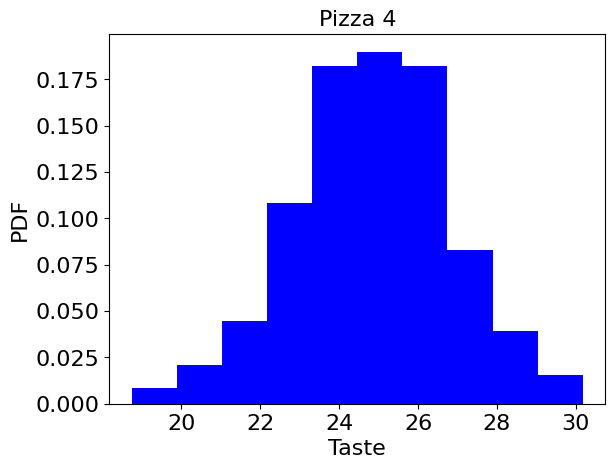

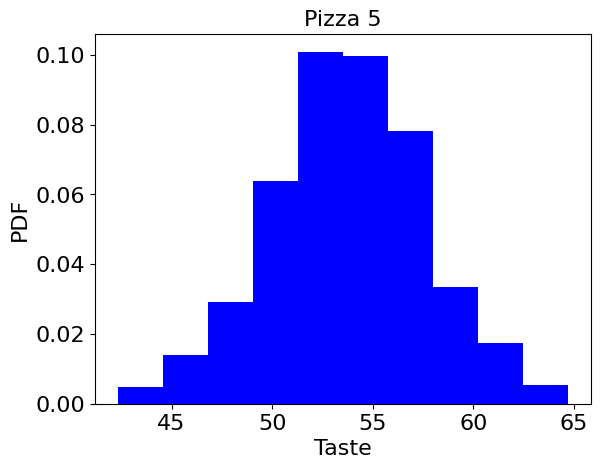

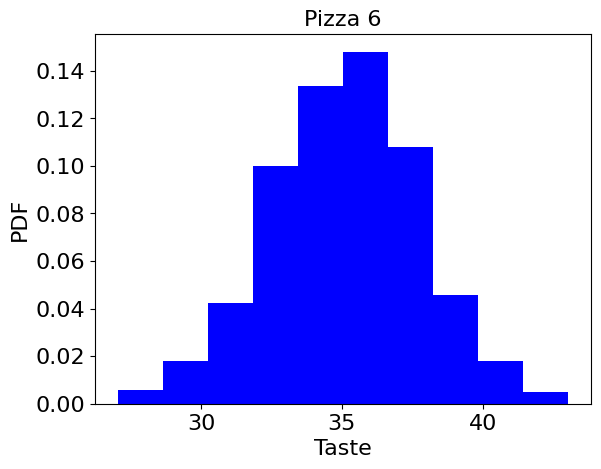

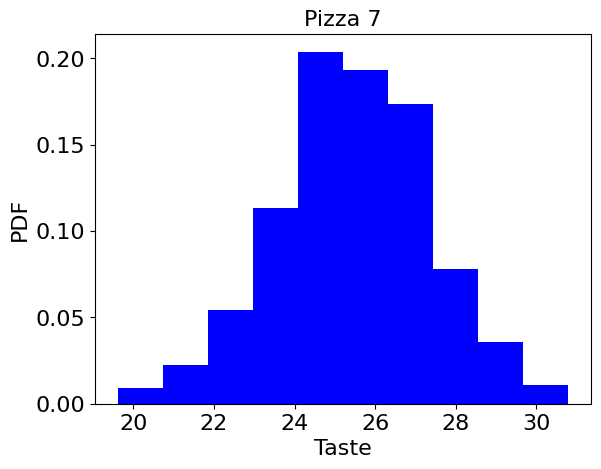

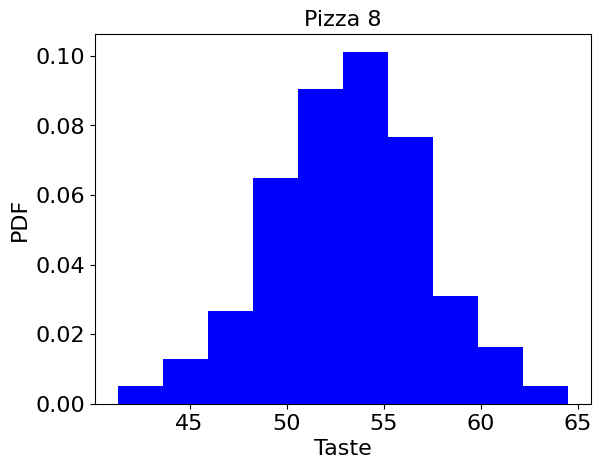

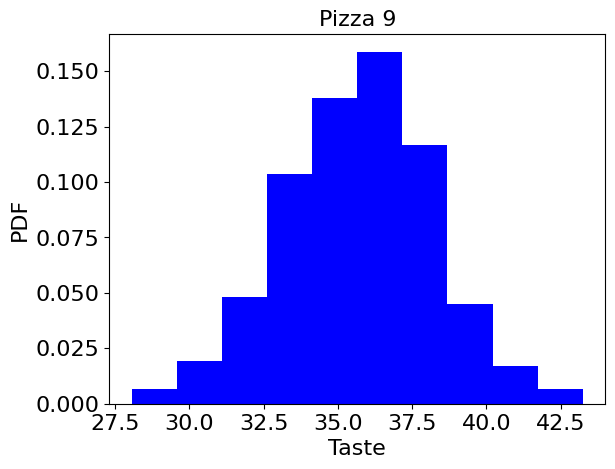

In [240]:
for i in range(pizza_menu.__len__()):
    plt.hist(pizza_menu.pizzas[i].taste, color="b", density=True)
    plt.xlabel("Taste")
    plt.ylabel("PDF")
    plt.title(f"Pizza {i}")
    plt.show()

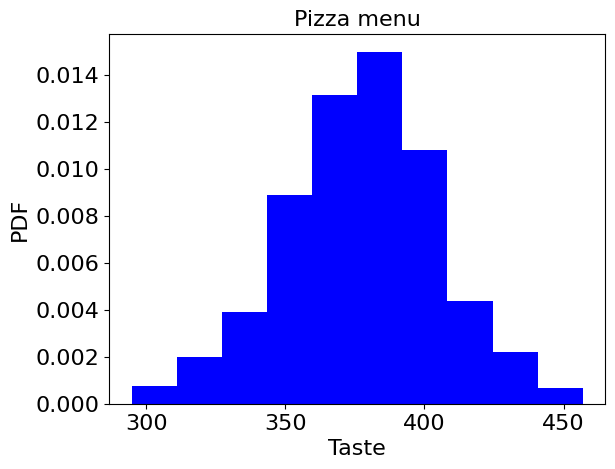

In [196]:
plt.hist(sum(pizza.taste for pizza in pizza_menu.pizzas), color="b", density=True)
plt.xlabel("Taste")
plt.ylabel("PDF")
plt.title("Pizza menu")
plt.show()

In [243]:
print("Sum of TaRs of each pizza:", 
      sum(taste_at_risk_pizza(pizza=pizza, quantile=quantile) for pizza in pizza_menu.pizzas), 
      sep="\n")

Sum of TaRs of each pizza:
342.23580685759936


In [ ]:
# The TaR of the whole menu is larger than the sum of the individual TaRs of the pizzas. 
# Thus, TaR does not satisfy the subadditivity of a coherent risk measure and does not 
# benefit from diversification.

In [7]:
# Compute Conditional Taste at Risk (CTaR) for each pizza in the menu and for the whole menu and briefly comment on the results

# Hint: use functions that you have implemented in the taste_at_risk.py


In [225]:
print("CTaR of each pizza:", 
      *[conditional_taste_at_risk_pizza(pizza=pizza, quantile=quantile) for pizza in pizza_menu.pizzas], 
      sep="\n")
print("")
print("CTaR of the whole menu:", conditional_taste_at_risk_menu(menu=pizza_menu, quantile=quantile), sep="\n")

CTaR of each pizza:
30.489425321241466
22.0188388800049
46.14025762489395
31.280324411901933
21.305697222740697
46.89349039601546
30.489425321241466
22.0188388800049
46.14025762489395
31.280324411901933

CTaR of the whole menu:
328.56118499766603


In [279]:
print([conditional_taste_at_risk_pizza(pizza=pizza, quantile=quantile) 
       <= taste_at_risk_pizza(pizza=pizza, quantile=quantile) for pizza in pizza_menu.pizzas])

[True, True, True, True, True, True, True, True, True, True]


In [ ]:
# The individual CTaR of each pizza is less than or equal to its individual TaR.
# The CTaR of the whole menu is less than or equal to the TaR of the whole menu.
# The relationship CTaR <= TaR for the same confidence level/quantile is as expected, 
# since CTaR is a more conservative risk measure than TaR.

In [244]:
print("Sum of CTaRs of each pizza:", 
      sum(conditional_taste_at_risk_pizza(pizza=pizza, quantile=quantile) for pizza in pizza_menu.pizzas),
     sep="\n")

Sum of CTaRs of each pizza:
328.0568800948406


In [8]:
# Define constraints_values and constraints_ingredients and find the optimal pizza using the func maximize_taste_penalty_price, that you have implemented in the pizza_optimizer.py
# Use lambda_param = 0.5

# Add this pizza to the menu using the add_pizza method of the PizzaMenu class


In [351]:
# Here I assume a minimalist optimal pizza.
optimal_pizza = Pizza(sauce=PizzaIngredients.TOMATO_SAUCE, dough=PizzaIngredients.CLASSIC_DOUGH)
pizza_menu.add_pizza(optimal_pizza)

In [352]:
# Compute the new TaR and CTaR for the whole new menu with added pizza


In [353]:
print("TaR of the whole menu:", taste_at_risk_menu(menu=pizza_menu, quantile=quantile), sep="\n")
print("")
print("CTaR of the whole new menu:", conditional_taste_at_risk_menu(menu=pizza_menu, quantile=quantile), sep="\n")

TaR of the whole menu:
349.45408857941516

CTaR of the whole new menu:
335.22116968554803


In [354]:
pizza_menu.remove_pizza(optimal_pizza)

In [10]:
# Compare old and new TaR and CTaR and briefly comment on the results.

In [ ]:
# How ever the optimal pizza will look like, it will contain ingredients, which again 
# contain a certain amount of fat, which eventually yields a certain taste of the pizza 
# greater than zero.
# Thus, by adding another pizza to the menu, the taste distribution of the whole menu (see 
# histogram above) is shifted to the right and both TaR and CTaR of the whole menu increase.